[View in Colaboratory](https://colab.research.google.com/github/weiffert/SIGAI-Housing-Data-Analysis/blob/master/LinearRegression.ipynb)

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/PurdueSIGAI/Kaggle-Fall-2018/master/california_housing_train.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,332400
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,252100
2,-118.02,33.90,34,2678,511,1540,497,4.4954,202900
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,116300
4,-120.90,39.93,23,2679,546,1424,529,2.8812,81900


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000
mean,-119.559762,35.623519,28.564936,2646.105163,539.147228,1427.779894,500.865495,3.881684,206885.214076
std,2.005374,2.138184,12.546966,2173.779547,417.720038,1111.246219,379.887676,1.903772,115587.218841
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.780000,33.930000,18.000000,1467.000000,298.000000,793.000000,283.000000,2.567400,119325.000000
50%,-118.490000,34.250000,29.000000,2130.000000,435.000000,1169.000000,410.000000,3.548100,180400.000000
75%,-118.000000,37.710000,37.000000,3151.750000,648.750000,1719.750000,607.000000,4.767900,264000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [6]:
type(df["longitude"].head())

pandas.core.series.Series

In [7]:
df["longitude"].head()

0   -122.00
1   -122.07
2   -118.02
3   -121.79
4   -120.90
Name: longitude, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b313e29b0>]],
      dtype=object)

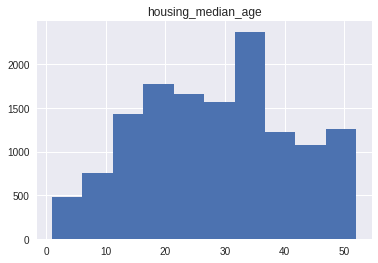

In [8]:
df.hist('housing_median_age')

# Single Variable Linear Regression

In [0]:
# derivative of cost function block
def derivativeOfCostFunctionBias(df, actual, bias, weights):
  sum = 0
  for i in range(len(column)):
    sum += weights[i] * column[i].sum
  sum += bias - actual
  
  return 2.0 / len(row) * sum


In [0]:
def derivativeOfCostFunctionWeight(df, actual, bias, weights, index):
  #Calculates derivative for a given weight
  #Go through the column given and perform the partial derivative
  #Update the weight by returning the value
  sum = 0
  for i in range(len(columns)):
    sum += weights[i] * column[i].sum
  sum = (sum + bias - actual) * weights[index]
  
  return 2.0 / len(row) * sum


In [0]:
# cost function block
def costFunction(df, bias, weights):
  # iterate over rows
  MSE = 0
  N = len(df)
  for i in range(N):
    row = df.loc[i]
    # Add MSE portion
    MSE += (row['median_house_value'] - rowPrediction(row, bias, weights)) ** 2

  return MSE / N

In [0]:
# row prediction block
def rowPrediction(row, bias, weights):
  #May have to define the row length
  for i in range(row):
    bias += weights[i] * row[i]
  return bias

In [0]:
# step block (Gradient Descent)
def step(df, bias, weights, learningRate):
  bias = bias - learningRate * derivativeOfCostFunctionBias(X, y, bias, weights)
  
  for i in range(len(weights))
      weight = weight - learningRate * derivativeOfCostFunctionWeight(X, y, bias, weights)
  return [bias, weight]

SyntaxError: ignored

In [0]:
"""
Psuedocode of how this should work:

totalSum
sum over each row, getting the mean squared error.
  to get prediction:
    iterate over each column.
      sum = column value * weight
    sum += bias
    return sum 
  calculate MSE:
    actual values - predicted values ** 2 
    return that value / N
    
step function for minimizing
  get the derivative over each row and update.
  do the same for bias.
  
"""

In [0]:
def prediction(df, row, theta):    
  prediction = 0.0
  
  X = df.loc[row];
  for i in range(df.columns.size):
    # perform calculation on X[i].
    prediction += theta[i+1] * X[i]
    
    
  return prediction + theta[0]

In [0]:
# Gradient Descent
def step(learningRate, X, y, bias, weight):
  # do not delete the old weights
  
  tempArr = []
  bias = bias - learningRate * derivativeOfCostFunctionBias(X, y, bias, weight)
  weight = weight - learningRate * derivativeOfCostFunctionWeight(X, y, bias, weight)
  return newTheta

In [71]:
theta = [1]
for i in range(df.columns.size):
  theta.append(1)
  
for i in range(2000):
  if(i % 10) == 0:
    print(costFunction(df, theta))

KeyError: ignored

In [0]:
print(X)